In [11]:
import re
import pandas as pd
data  = pd.read_csv("dataset.csv")

In [12]:
texts = data['Text'].values
labels = data['Label'].values

In [13]:
import imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [14]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["text", "label"]

In [15]:
data = pd.read_csv('dataset.csv',sep=',')
data.head()

,Text,Label
0,Damn I thought they had strict gun laws in Ger...,0
1,I dont care about what it stands for or anythi...,0
2,It's not a group it's an idea lol,0
3,So it's not just America!,0
4,The dog is a spectacular dancer considering he...,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17596 entries, 0 to 17595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    17596 non-null  object
 1   Label   17596 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 275.1+ KB


In [17]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Label"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(17596, 2)
(17596,)



Exploratory Data Analysis

In [18]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Label"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(17596, 2)
(17596,)


In [19]:

data.isnull().values.any()


False

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3352\1020538314.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Label'], sort = True)


Text(0, 0.5, 'Frequency')

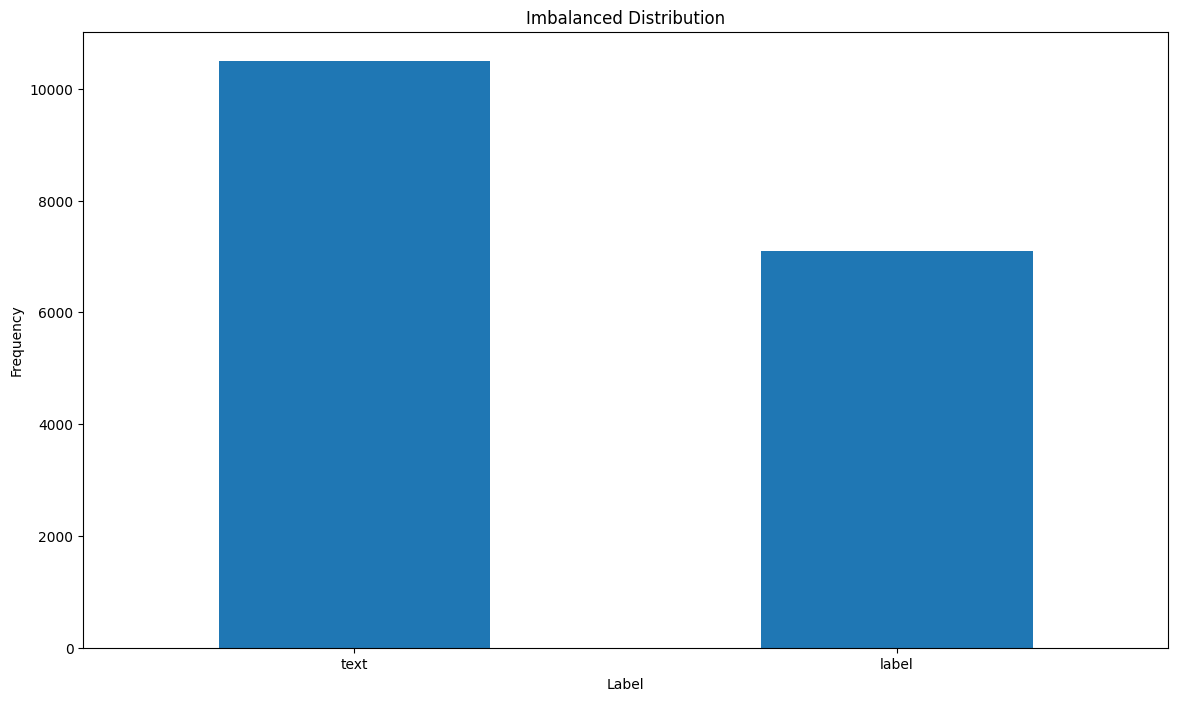

In [20]:
count_classes = pd.value_counts(data['Label'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Imbalanced Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Label")

plt.ylabel("Frequency")

In [21]:
from imblearn.under_sampling import NearMiss

In [22]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Label"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(17596, 2)
(17596,)


In [23]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(data.drop(columns=['Label']),data['Label'])
print("Undersampled class distribution:\n", y_under.value_counts())

Undersampled class distribution:
 Label
0    7100
1    7100
Name: count, dtype: int64


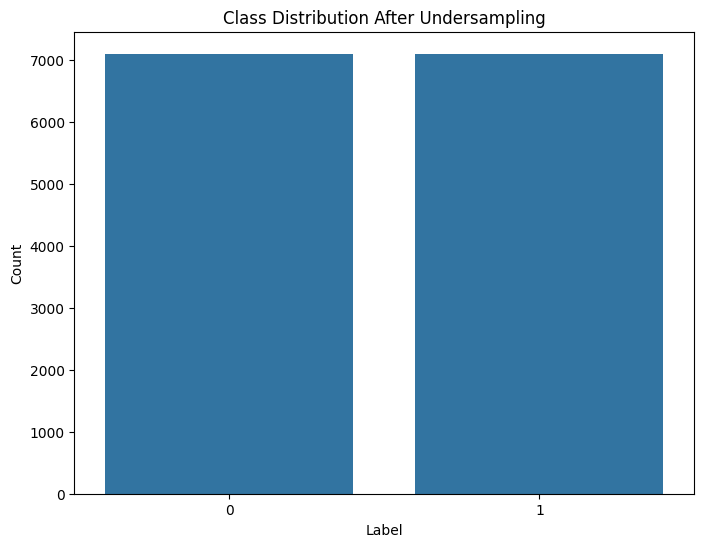

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_under)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()